In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Input

In [2]:
mnist = tf.keras.datasets.mnist #this mnist contain images of 28X28 from 0 to 9 digits

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

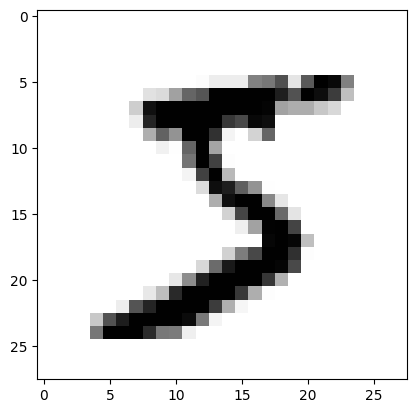

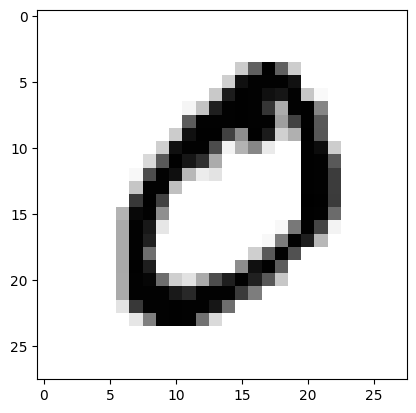

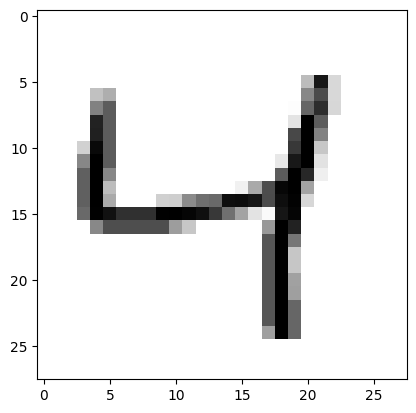

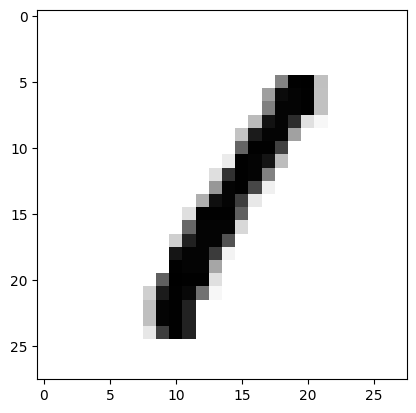

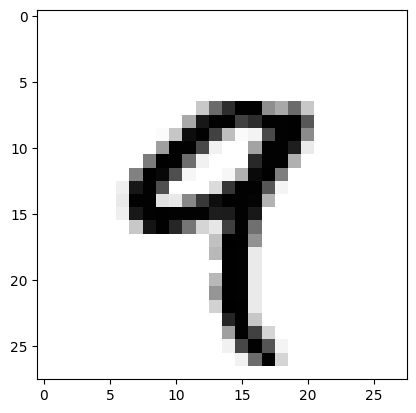

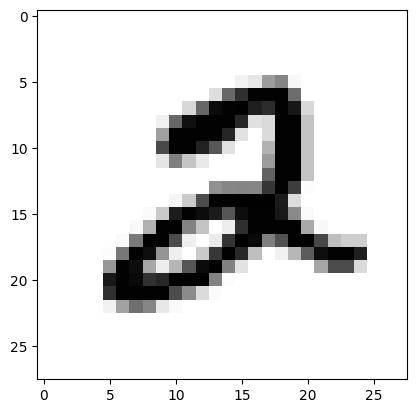

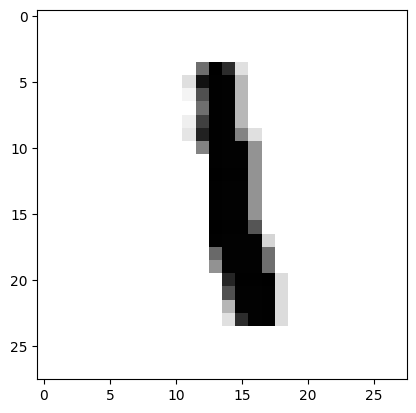

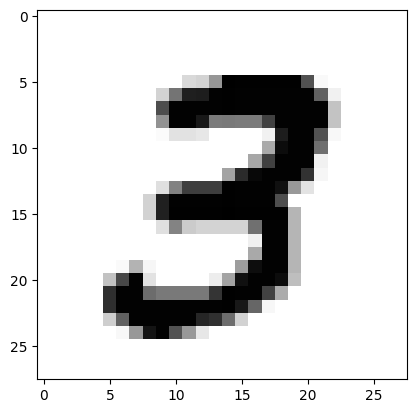

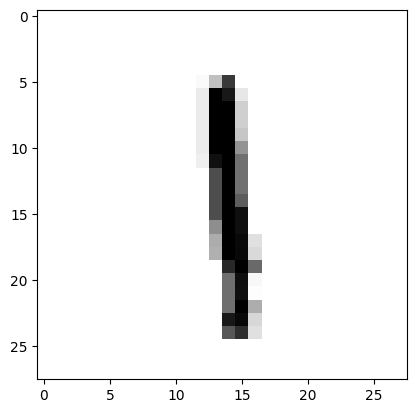

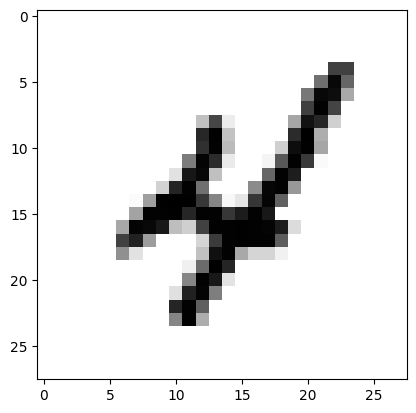

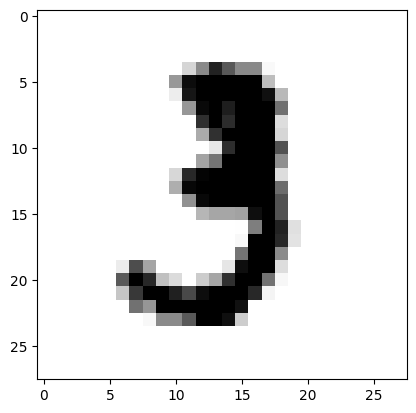

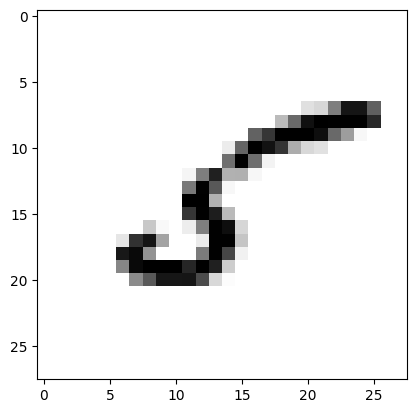

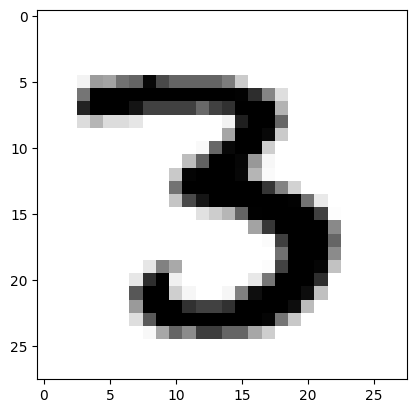

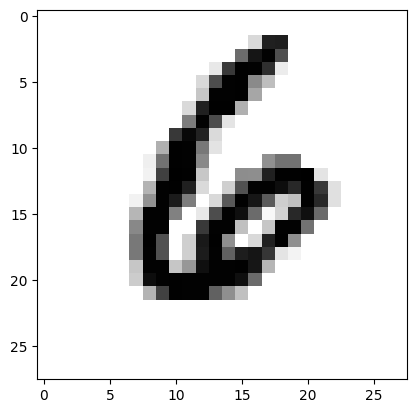

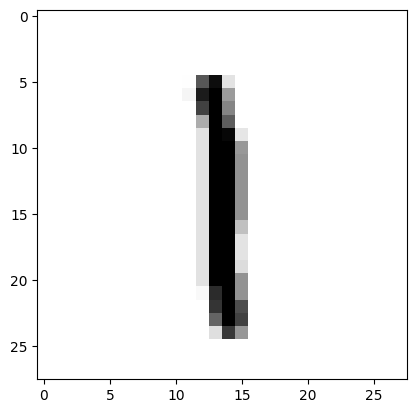

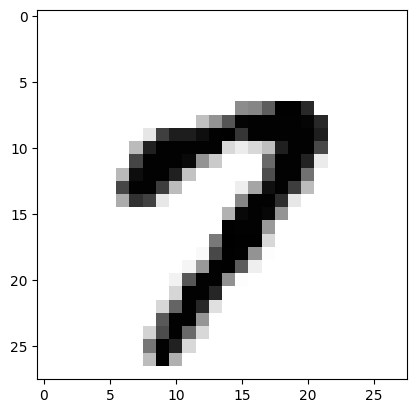

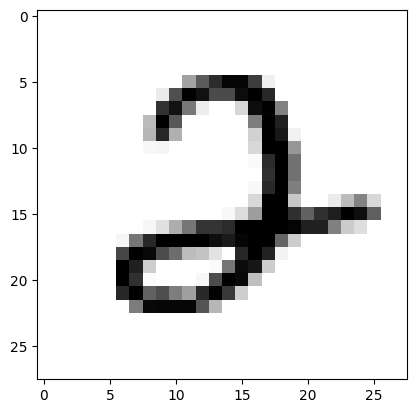

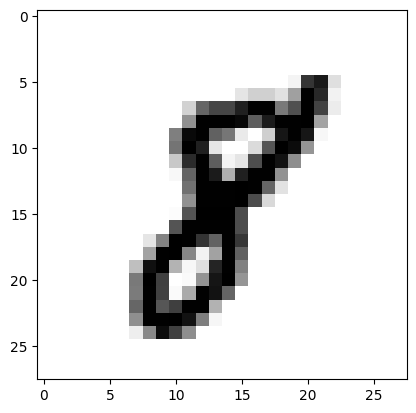

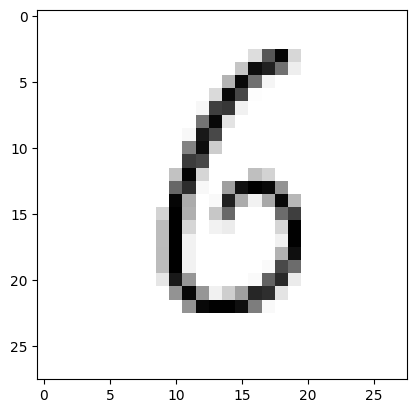

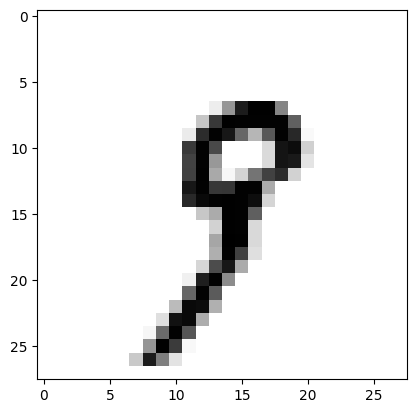

In [4]:
x_train.shape
for i in range (0, 20):
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.show()

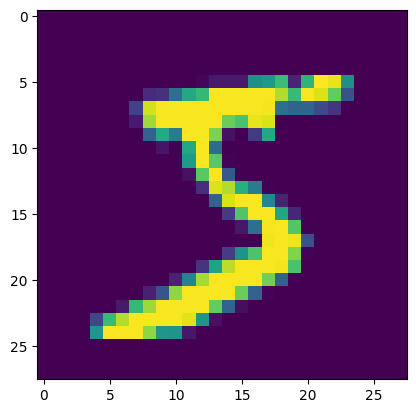

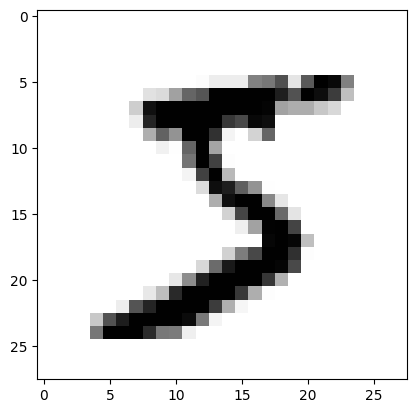

In [5]:
plt.imshow(x_train[0])
plt.show()
#there is no RGB COLOR 
#only the shades of grey (0 - 255) 
#->black 255->white
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [6]:
print(x_train[0]) #before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

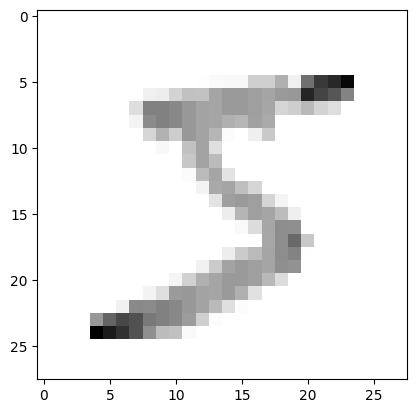

In [7]:
#normalizing
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
#resizing img to make it suitable for apply convolution operation
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimensions :", x_trainr.shape)
print("Testing Samples dimensions :", x_testr.shape)

Training Samples dimensions : (60000, 28, 28, 1)
Testing Samples dimensions : (10000, 28, 28, 1)


### CREATING DEEP NEURAL NETWORK

In [10]:
# Creating a neural network
model = Sequential()

# First Convolution Layer
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

# Output Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_trainr, y_train,epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 92s 68ms/step - loss: 0.3515 - accuracy: 0.8869 - val_loss: 0.1571 - val_accuracy: 0.9522
Epoch 2/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.1073 - accuracy: 0.9660 - val_loss: 0.1025 - val_accuracy: 0.9697
Epoch 3/5
1313/1313 [==============================] - 82s 63ms/step - loss: 0.0773 - accuracy: 0.9764 - val_loss: 0.0861 - val_accuracy: 0.9736
Epoch 4/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.0738 - val_accuracy: 0.9778
Epoch 5/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0628 - val_accuracy: 0.9808


In [15]:

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss ion 10,000 test samples :", test_loss)
print("Validation Accuracy on 10,000 test samples : ", test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0593 - accuracy: 0.9824
Test loss ion 10,000 test samples : 0.05929218605160713
Validation Accuracy on 10,000 test samples :  0.9824000000953674


In [16]:
model.save("digit_recognition_model.keras")